In [5]:
%load_ext autoreload
%autoreload 2
import brian2.numpy_ as np
import brian2.only as bb
from brian2 import ms, second, Hz, mV, pA, nS, pF
from matplotlib import pyplot as plt
from tqdm import tqdm
import assemblyseq.assemblyseq as asq

from assemblyseq import plotter
import assemblyseq.calc_spikes as cs


faster_run = True

if faster_run:
    bb.set_device('cpp_standalone', directory='PETH_standalone', build_on_run=False)

In [6]:
config = {'Ne': 20000, 'Ni': 5000, 'cp_ee': .01, 'cp_ie': .01, 'cp_ei': 0.01, 'cp_ii': .01,
              'n_ass': 10, 's_ass': 500, 'pr': .15, 'pf': .03, 'symmetric_sequence': True, 'p_rev': .03,
              'g_ee': 0.1 * nS, 'g_ie': 0.1 * nS, 'g_ei': 0.4 * nS, 'g_ii': 0.4 * nS}

In [7]:
bb.start_scope()
if faster_run:
    bb.get_device().reinit()
    bb.get_device().activate(build_on_run=False, directory='PETH_standalone')

nn = asq.Nets(config)

initiated  Mon May 18 17:04:34 2020


In [8]:
nn.generate_ps_assemblies('gen_no_overlap')
nn.set_net_connectivity()

nn.set_spike_monitor()
nn.set_rate_monitor()

for gr_num in tqdm(range(nn.n_ass)):
    gr = nn.p_ass_index[0][gr_num]
    t_inp = (20.55 + gr_num * .1) * second
    nn.set_noisy_input(gr, t_inp, sigma=0 * ms)

nn.set_syn_input(nn.p_ass_index[0][0], np.arange(46, 51,1))
nn.balance(10 * second, 5.)
nn.balance(10 * second, 5.)
nn.balance(20 * second, .1)
nn.balance(5 * second, .01)
nn.run_sim(22*second)
# nn.Pe.I -= .0 * pA

A random sequence without overlaps is created


100%|██████████| 10/10 [00:00<00:00, 72.31it/s]

connections imprinted!  Mon May 18 17:04:45 2020


balanced:  0.6985223293304443
balanced:  0.2559170722961426
balanced:  0.26297497749328613
balanced:  0.26123809814453125
run:  0.26402807235717773


In [9]:
nn.get_parameters()

{'Ne': 20000,
 'Ni': 5000,
 'cp_ee': 0.01,
 'cp_ie': 0.01,
 'cp_ei': 0.01,
 'cp_ii': 0.01,
 'pr': 0.15,
 'pf': 0.03,
 'g_ee': 100. * psiemens,
 'g_ie': 100. * psiemens,
 'g_ei': 0.4 * nsiemens,
 'g_ii': 0.4 * nsiemens,
 'n_ass': 10,
 's_ass': 500,
 'n_chains': 1,
 'cf_ffn': 1.0,
 'cf_rec': 1.0,
 'type_ext_input': 'curr',
 'ext_input': 200. * pamp,
 'synapses_per_nrn': 250,
 'inject_some_extra_i': False,
 'g_ff_coef': 1,
 'symmetric_sequence': True,
 'p_rev': 0.03,
 'extra_recorded_nrns': False,
 'limit_syn_numbers': False,
 'continuous_ass': False,
 'use_random_conn_ff': False,
 'modified_contin': False,
 'g_l': 10. * nsiemens,
 'C_m': 200. * pfarad,
 'v_r': -60. * mvolt,
 'v_e': 0. * volt,
 'v_i': -80. * mvolt,
 'tau_m_exc': 20. * msecond,
 'tau_m_inh': 20. * msecond,
 'tau_inh': 10. * msecond,
 'tau_fast_inh': 10. * msecond,
 'tau_exc': 5. * msecond,
 'tau_stdp': 20. * msecond,
 'alpha': 0.2,
 'g_min': 0. * siemens,
 'g_max': 50. * nsiemens,
 'eta_p': 0.0}

In [10]:
%%time
if faster_run:
    bb.device.build(directory='PETH_standalone', compile=True, run=True, debug=False)

CPU times: user 376 ms, sys: 126 ms, total: 503 ms
Wall time: 2min 48s


(0, 1000)

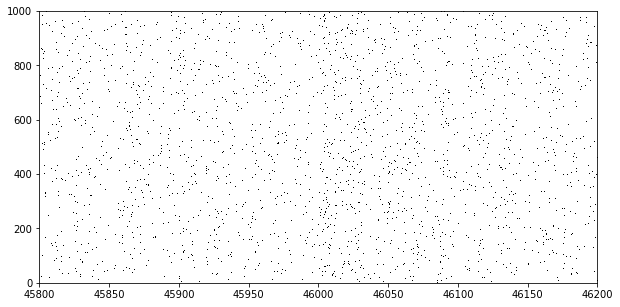

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(nn.mon_spike_e.t/ms, nn.mon_spike_e.i, ',k')
plt.xlim([45800, 46200])
plt.ylim([0, 1000])

<Figure size 720x360 with 0 Axes>

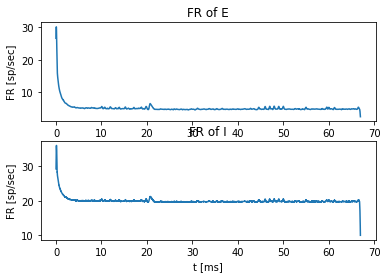

In [12]:
plt.figure(figsize=(10, 5))
plotter.plot_pop_fr(nn)

In [13]:
spikes = cs.get_spike_times_ps(nn, n_ps=0, frac=0.02)

si, st = zip(*spikes)

(45500, 60500)

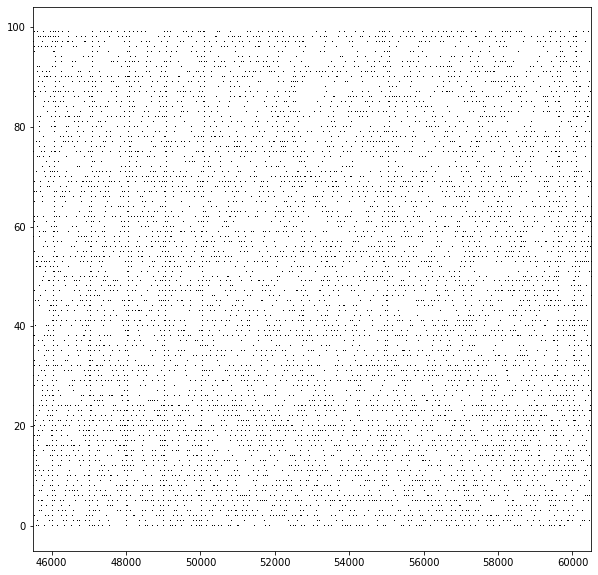

In [14]:
plt.figure(figsize=(10, 10))
plt.plot(st/ms, si, ',k')
plt.xlim([45500, 60500])

In [65]:
set_syn_input(nn, nn.p_ass_index[0][0], 23. * second)

In [59]:
np.array(23.*second)

array(23.)